# Explore here

It's recommended to use this notebook for exploration purposes.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# elijo la url de descarga
resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(resource_url, time.sleep(10)).text

if "403 Forbidden" in data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(resource_url, headers = headers)
    time.sleep(10)
    data = request.text

print(data)

<html>
<head>

</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">

<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>  
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>

<ul>
  <li>Go to <a href='https://whatismyipaddress.com/' target='_blank' rel='noopener noreferrer'>whatismyipaddress</a> and obtain your IPv4 address</li>
  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>
  <li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}f

In [5]:
soup = BeautifulSoup(data,"html.parser")
tables = soup.find_all("table")
print(soup)
print(tables)

<html>
<head>
</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>
<ul>
<li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
<li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
<li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}function t(e,t){v

In [18]:
for i, x in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(x)):
        table_index = i
        break
table_index

#Creacion del dataframe con la tabla
tesla_rev = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_rev = pd.concat([tesla_rev, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

NameError: name 'table_index' is not defined

In [ ]:
tesla_rev = tesla_rev[tesla_rev["Revenue"] != ""]
tesla_rev.head()

In [14]:
connection = sqlite3.connect("DBTesla.db")

cursor = connection.cursor()
cursor.execute("""CREATE TABLE Revenue (Date, Revenue)""")

tesla_tuples = list(tesla_rev.to_records(index = False))
tesla_tuples[:5]

[]

In [15]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

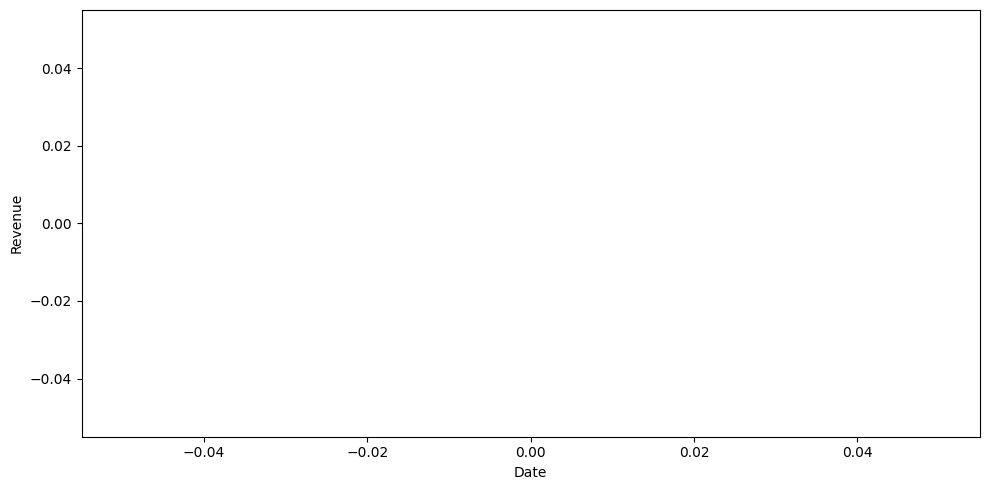

In [17]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_rev["Date"] = pd.to_datetime(tesla_rev["Date"])
tesla_rev["Revenue"] = tesla_rev["Revenue"].astype('int')
sns.lineplot(data = tesla_rev, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()